# (25) fMRI to CCFv3

**Motivation**: Transform fMRI data to the common space.

- **Edit, Aug28:** It didn't work, can't apply affine to 4D time-series data. Moving on. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, Latex

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prep

In [2]:
from register.register import Register, reset_ants_img

mice = Mice(512, full_load=True, load_allen=True)
reg = Register(mice)
reg.set_mode('bold')

mice.kws

{
    'task': 'rest',
    'exclude': True,
    'runs_only': True,
    'band_ca2': (0.01, 5.0),
    'band_bold': (0.01, 0.5),
    'desc_ca2': 'preproc',
    'desc_bold': 'rabies-hp'
}

In [3]:
anchor_ses = 2
other_ses = [
    j for j in mice.cfg.ses_ids
    if j != anchor_ses
]
for sub in mice.cfg.sub_ids:
    key_fx = mice.get_key(sub, anchor_ses)
    fx = mice.T1w[key_fx].load_ants()
    fx *= mice.mask3d[key_fx].load_ants()

    tx, tx_aff = reg.load_tx(
        name=key_fx, is_inv=False)
    affined = tx_aff.apply_to_image(
        image=reg.reorient(fx),
        reference=reg.nissl,
        interpolation='linear',
    )

    for ses_mv in other_ses:
        key_mv = mice.get_key(sub, ses_mv)
        mv = mice.T1w[key_mv].load_ants()
        mv *= mice.mask3d[key_mv].load_ants()

        tx_rig = ants.registration(
            fixed=mv,
            moving=fx,
            type_of_transform='DenseRigid',
            verbose=False,
        )

    break

In [4]:
{'fwdtransforms': tx}

{
    'fwdtransforms': [
        '/home/hadi/Documents/Ca-fMRI/processed/transforms/sub-SLC01_ses-2_space-CCF3d_ants-fwd.nii.gz',
        '/home/hadi/Documents/Ca-fMRI/processed/transforms/sub-SLC01_ses-2_space-CCF3d_ants-fwd.mat'
    ]
}

In [5]:
key_fx

'sub-SLC01_ses-2'

In [6]:
for run in mice.cfg.run_ids:
    key_run = mice.get_key(sub, anchor_ses, run)

In [7]:
x = mice.bold_preproc[key_run].load_ants()
x

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 64, 78, 506)
         Spacing    : (0.2, 0.2, 0.2, 1.0)
         Origin     : (6.4, -6.2, -7.8, 0.0)
         Direction  : [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

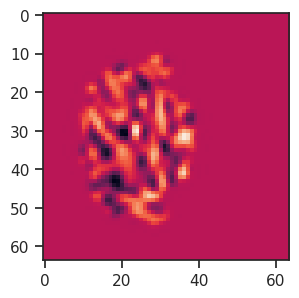

In [8]:
tmp = x.numpy()
plt.imshow(tmp[..., 20, 54]);

In [9]:
x_re = reg.reorient(x)

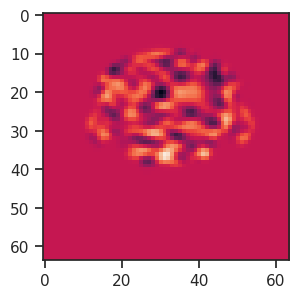

In [16]:
tmp = x_re.numpy()
plt.imshow(tmp[-20, ..., 54]);

In [12]:
reg.tr_axes

(2, 1, 0)

In [13]:
x.shape

(64, 64, 78, 506)

In [24]:
reg.in_house_name, reg.in_house_res

('Symmetric_N162', 200)

In [13]:
mice.bold_preproc

{
    'sub-SLC01_ses-1_run-1': <model.dataset.FuncData object at 0x7fb138a230d0>,
    'sub-SLC01_ses-1_run-2': <model.dataset.FuncData object at 0x7fb138a23820>,
    'sub-SLC01_ses-1_run-3': <model.dataset.FuncData object at 0x7fb138a235e0>,
    'sub-SLC01_ses-1_run-4': <model.dataset.FuncData object at 0x7fb138a23670>,
    'sub-SLC01_ses-1_run-5': <model.dataset.FuncData object at 0x7fb138a23430>,
    'sub-SLC01_ses-1_run-6': <model.dataset.FuncData object at 0x7fb138a23310>,
    'sub-SLC01_ses-1_run-7': <model.dataset.FuncData object at 0x7fb138a23940>,
    'sub-SLC01_ses-2_run-1': <model.dataset.FuncData object at 0x7fb138a239d0>,
    'sub-SLC01_ses-2_run-2': <model.dataset.FuncData object at 0x7fb138a234c0>,
    'sub-SLC01_ses-2_run-3': <model.dataset.FuncData object at 0x7fb138a23e50>,
    'sub-SLC01_ses-2_run-4': <model.dataset.FuncData object at 0x7fb138a23f70>,
    'sub-SLC01_ses-2_run-5': <model.dataset.FuncData object at 0x7fb138a23c10>,
    'sub-SLC01_ses-2_run-6': <model.dataset.FuncData object at 0x7fb138a23b80>,
    'sub-SLC01_ses-2_run-7': <model.dataset.FuncData object at 0x7fb138a250d0>,
    'sub-SLC01_ses-3_run-1': <model.dataset.FuncData object at 0x7fb138a251f0>,
    'sub-SLC01_ses-3_run-2': <model.dataset.FuncData object at 0x7fb138a25820>,
    'sub-SLC01_ses-3_run-3': <model.dataset.FuncData object at 0x7fb138a25670>,
    'sub-SLC01_ses-3_run-4': <model.dataset.FuncData object at 0x7fb138a255e0>,
    'sub-SLC01_ses-3_run-5': <model.dataset.FuncData object at 0x7fb138a25790>,
    'sub-SLC01_ses-3_run-6': <model.dataset.FuncData object at 0x7fb138a25310>,
    'sub-SLC01_ses-3_run-7': <model.dataset.FuncData object at 0x7fb138a25940>,
    'sub-SLC02_ses-1_run-1': <model.dataset.FuncData object at 0x7fb138a259d0>,
    'sub-SLC02_ses-1_run-2': <model.dataset.FuncData object at 0x7fb138a254c0>,
    'sub-SLC02_ses-1_run-3': <model.dataset.FuncData object at 0x7fb138a25e50>,
    'sub-SLC02_ses-1_run-4': <model.dataset.FuncData object at 0x7fb138a25dc0>,
    'sub-SLC02_ses-1_run-5': <model.dataset.FuncData object at 0x7fb138a25f70>,
    'sub-SLC02_ses-1_run-6': <model.dataset.FuncData object at 0x7fb138a25b80>,
    'sub-SLC02_ses-1_run-7': <model.dataset.FuncData object at 0x7fb138a27160>,
    'sub-SLC02_ses-2_run-1': <model.dataset.FuncData object at 0x7fb138a27280>,
    'sub-SLC02_ses-2_run-2': <model.dataset.FuncData object at 0x7fb138a27820>,
    'sub-SLC02_ses-2_run-3': <model.dataset.FuncData object at 0x7fb138a27670>,
    'sub-SLC02_ses-2_run-4': <model.dataset.FuncData object at 0x7fb138a27790>,
    'sub-SLC02_ses-2_run-5': <model.dataset.FuncData object at 0x7fb138a275e0>,
    'sub-SLC02_ses-2_run-6': <model.dataset.FuncData object at 0x7fb138a273a0>,
    'sub-SLC02_ses-2_run-7': <model.dataset.FuncData object at 0x7fb138a270d0>,
    'sub-SLC02_ses-3_run-1': <model.dataset.FuncData object at 0x7fb138a27a60>,
    'sub-SLC02_ses-3_run-2': <model.dataset.FuncData object at 0x7fb138a274c0>,
    'sub-SLC02_ses-3_run-3': <model.dataset.FuncData object at 0x7fb138a27e50>,
    'sub-SLC02_ses-3_run-4': <model.dataset.FuncData object at 0x7fb138a27f70>,
    'sub-SLC02_ses-3_run-5': <model.dataset.FuncData object at 0x7fb138a27ee0>,
    'sub-SLC02_ses-3_run-6': <model.dataset.FuncData object at 0x7fb138a27b80>,
    'sub-SLC02_ses-3_run-7': <model.dataset.FuncData object at 0x7fb138a80cd0>,
    'sub-SLC03_ses-1_run-1': <model.dataset.FuncData object at 0x7fb1486e53a0>,
    'sub-SLC03_ses-1_run-2': <model.dataset.FuncData object at 0x7fb1486e5f40>,
    'sub-SLC03_ses-1_run-3': <model.dataset.FuncData object at 0x7fb138a1cc70>,
    'sub-SLC03_ses-1_run-4': <model.dataset.FuncData object at 0x7fb138a1cbe0>,
    'sub-SLC03_ses-1_run-5': <model.dataset.FuncData object at 0x7fb138a1ccd0>,
    'sub-SLC03_ses-1_run-6': <model.dataset.FuncData object at 0x7fb138a1f2e0>,
    'sub-SLC03_ses-1_run-7': <model.dataset.FuncData object at 0x7fb138a1feb0>,
    'sub-SLC03_ses-2_run-1': <model.dataset.FuncData object at 0x7fb138a1f220>